## The Machine Learning Project:-

Credit to: `Gloria Loyce Nankoma 2022/HD02/2048U`<br>
Credit to: ` Ainemambazi Moses 2022/HD07/2039U`

Instructor: `Mugume Twinamatsiko Atwine`

## **<span style="color:#C7920C;">IMPORT LIBRARIES AND DATASETS.</span>**
We begin by importing necessary Libraries and Data sets. these will help us to run our analysis

In [434]:
# Import the necessary packages
import numpy as np
import pandas as pd
import ydata_profiling as pf
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import webbrowser 
import os 
# Algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from pandas import read_csv
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.metrics import plot_precision_recall_curve
import pickle
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from pandas.core.arrays.sparse import SparseArray as _SparseArray

## **<span style="color:#C7920C;">DATA SET DESCRIPTION</span>**

looking at the data set using the data.head() function. Generally it shows different patients with their diferent signs and symptoms as related to mainly 4 dieases. We have learnt the following as explained below

- We can identify different signs and symptoms related to different diseases
- Under the Disease column We have the healthy,covid-19,HIV, Diabetes and Malaria
- Different diseases are related to Sexual orientation,Age, Gender or Race
- We learnt the BMI is calculated from Weight and Height.and we know that the higher the BMI the higher the risk of getting diseases like Diabetes.



In [364]:
# Load dataset
patients = read_csv('dataset.csv')
# Print the first 5 rows of the dataframe.
patients.head(10)

PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   
4      67143   81    Male            Asexual    African      83     144  40.0   
5      16774   64  Female       Heterosexual      Asian      72     161  27.8   
6      76208   30    Male         Homosexual     Others      67     187  19.2   
7      94625   44  Female         Homosexual  Caucasian      45     175  14.7   
8      37405   77    Male         Homosexual   Hispanic      88     210  20.0   
9      59690   96  Female       Heterosexual    African      93     176  30.0   

   Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      1      0  ...          1                  1           0            0   
1      1      1  ...          1                  0           0            1   
2      0      0  ...          1                  1           0            0   
3      1      0  ...          0                  1           1            1   
4      0      1  ...          0                  1           1            0   
5      0      0  ...          0                  1           0            0   
6      1      1  ...          0                  1           1            0   
7      1      0  ...          1                  1           0            0   
8      1      1  ...          0                  0           1            0   
9      0      1  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   
5                   0         1                      1       1   
6                   1         1                      0       0   
7                   1         0                      0       0   
8                   0         1                      0       1   
9                   0         0                      0       1   

   LossOfConsciousness   Disease  
0                    1   Healthy  
1                    1  Covid-19  
2                    0   Malaria  
3                    0  Diabetes  
4                    1  Covid-19  
5                    0   Healthy  
6                    0  Diabetes  
7                    1  Diabetes  
8                    1  Covid-19  
9                    0  Diabetes  

[10 rows x 61 columns]

we used the data.describe() function to calculate various statistical measures for each numerical column in the dataset. it also returns a new DataFrame that includes the following statistical information for each column by default:
- count: The number of non-null values in the column.
- mean: The arithmetic mean (average) of the values in the column.
- std: The standard deviation of the values in the column.
- min: The minimum value in the column.
- 25%: The first quartile (25th percentile) of the values in the column.
- 50%: The second quartile (median or 50th percentile) of the values in the column.
- 75%: The third quartile (75th percentile) of the values in the column.
- max: The maximum value in the column.



In [365]:
# Analyse statically insight of data
patients.describe()

PatientID           Age        Weight        Height           BMI  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   49903.771600     57.868300     79.703400    174.873700     27.160250   
std    28948.676218     24.669317     23.349817     20.335228     10.374548   
min        5.000000     15.000000     40.000000    140.000000      9.100000   
25%    24647.500000     37.000000     59.000000    157.000000     19.200000   
50%    49478.500000     58.000000     80.000000    175.000000     25.700000   
75%    75294.000000     79.000000    100.000000    192.000000     33.600000   
max    99991.000000    100.000000    120.000000    210.000000     61.200000   

              Label         Fever         Cough       Fatigue      BodyAche  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.499700      0.503100      0.498500      0.492200      0.489500   
std        0.500025      0.500015      0.500023      0.499964      0.499915   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      0.000000   
75%        1.000000      1.000000      1.000000      1.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...     RunnyNose    SinusPain  SwollenLymphNodes    MemoryLoss  \
count  ...  10000.000000  10000.00000       10000.000000  10000.000000   
mean   ...      0.503700      0.50220           0.496300      0.504300   
std    ...      0.500011      0.50002           0.500011      0.500007   
min    ...      0.000000      0.00000           0.000000      0.000000   
25%    ...      0.000000      0.00000           0.000000      0.000000   
50%    ...      1.000000      1.00000           0.000000      1.000000   
75%    ...      1.000000      1.00000           1.000000      1.000000   
max    ...      1.000000      1.00000           1.000000      1.000000   

        Dehydration  IncreasedUrination      DryMouth  TinglingInHandsOrFeet  \
count  10000.000000        10000.000000  10000.000000           10000.000000   
mean       0.490600            0.500500      0.498400               0.500400   
std        0.499937            0.500025      0.500022               0.500025   
min        0.000000            0.000000      0.000000               0.000000   
25%        0.000000            0.000000      0.000000               0.000000   
50%        0.000000            1.000000      0.000000               1.000000   
75%        1.000000            1.000000      1.000000               1.000000   
max        1.000000            1.000000      1.000000               1.000000   

             RedEye  LossOfConsciousness  
count  10000.000000         10000.000000  
mean       0.499100             0.493500  
std        0.500024             0.499983  
min        0.000000             0.000000  
25%        0.000000             0.000000  
50%        0.000000             0.000000  
75%        1.000000             1.000000  
max        1.000000             1.000000  

[8 rows x 57 columns]

The data info() function shows us that our data set has 10000 rows and 61 columns
It shows the column names, the null counts and the data types. we can learn that int64 objects and float64 data types(dtypes: float64(1), int64(56), object(4))


In [366]:
#Summary of the dataframe
#prints information about a DataFrame including the index dtype and columns, non-null values and memory usage
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientID              10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  object 
 3   Sexual_Orientation     10000 non-null  object 
 4   Race                   10000 non-null  object 
 5   Weight                 10000 non-null  int64  
 6   Height                 10000 non-null  int64  
 7   BMI                    10000 non-null  float64
 8   Label                  10000 non-null  int64  
 9   Fever                  10000 non-null  int64  
 10  Cough                  10000 non-null  int64  
 11  Fatigue                10000 non-null  int64  
 12  BodyAche               10000 non-null  int64  
 13  LossOfTaste            10000 non-null  int64  
 14  Sweating               10000 non-null  int64  
 15  Hea

## **<span style="color:#C7920C;">Exploratary Data Analysis using Pandas Profiling.</span>**
This will generate a report that gives basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 
- This helps us to clean our data by identifying missing values, handling outliers and tranforming data types.
- It gives a summary statistics such as mean, median, mode, and standard deviation to help understand the distribution of the data.
- Through graphs, charts, etc, we are able to visualize the data and identify different patterns, trends, and outliers.
- EDA helps us to identify the strength of relationships between variables using correlation and regression analysis

## **<span style="color:#C7920C;">Checking for missing and Null values in our dataset.</span>**

In [367]:
miss_values = patients.columns[patients.isnull().any()]
print(f"Missing values:\n{patients[miss_values].isnull().sum()}")

null_values = patients.columns[patients.isna().any()]
print(f"Null values:\n{patients[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


In [368]:
def missing (patients):
    missing_number = patients.isnull().sum().sort_values(ascending=False)
    missing_percent = (patients.isnull().sum()/patients.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(patients)

Missing_Number  Missing_Percent
PatientID                        0              0.0
StiffNeck                        0              0.0
SensitivityToLight               0              0.0
MoodSwings                       0              0.0
NeckPain                         0              0.0
...                            ...              ...
Chills                           0              0.0
SoreThroat                       0              0.0
Confusion                        0              0.0
Dizziness                        0              0.0
Disease                          0              0.0

[61 rows x 2 columns]

In [369]:
#checking for duplicates
patients.duplicated().sum()

0

In [370]:
features = patients.drop('Disease', axis=1)  # Exclude the 'Disease' column
labels = patients['Disease']

# Print the first few rows of features and labels
print("Features:")
print(features.head())
print("\nLabels:")
print(labels.head())

Features:
   PatientID  Age  Gender Sexual_Orientation       Race  Weight  Height   BMI  \
0      33216   72  Female             Others     Others     112     156  46.0   
1      89319   45  Female             Others  Caucasian      40     190  11.1   
2      48170   44    Male         Homosexual    African     112     209  25.6   
3      83430   40    Male       Heterosexual   Hispanic      83     195  21.8   
4      67143   81    Male            Asexual    African      83     144  40.0   

   Label  Fever  ...  RunnyNose  SinusPain  SwollenLymphNodes  MemoryLoss  \
0      1      0  ...          1          1                  1           0   
1      1      1  ...          1          1                  0           0   
2      0      0  ...          0          1                  1           0   
3      1      0  ...          0          0                  1           1   
4      0      1  ...          1          0                  1           1   

   Dehydration  IncreasedUrination  DryM

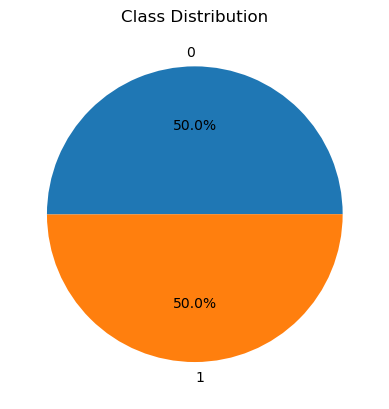

In [371]:
class_counts = patients['Label'].value_counts()

# Create a pie chart
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Class Distribution')

# Display the pie chart
plt.show()


Lets use the histograms to chech how the data in our data frame is balancing. and from the plots we can see that that our data is doing well it even deserves a soda. Except the BMI column that is not balancing well

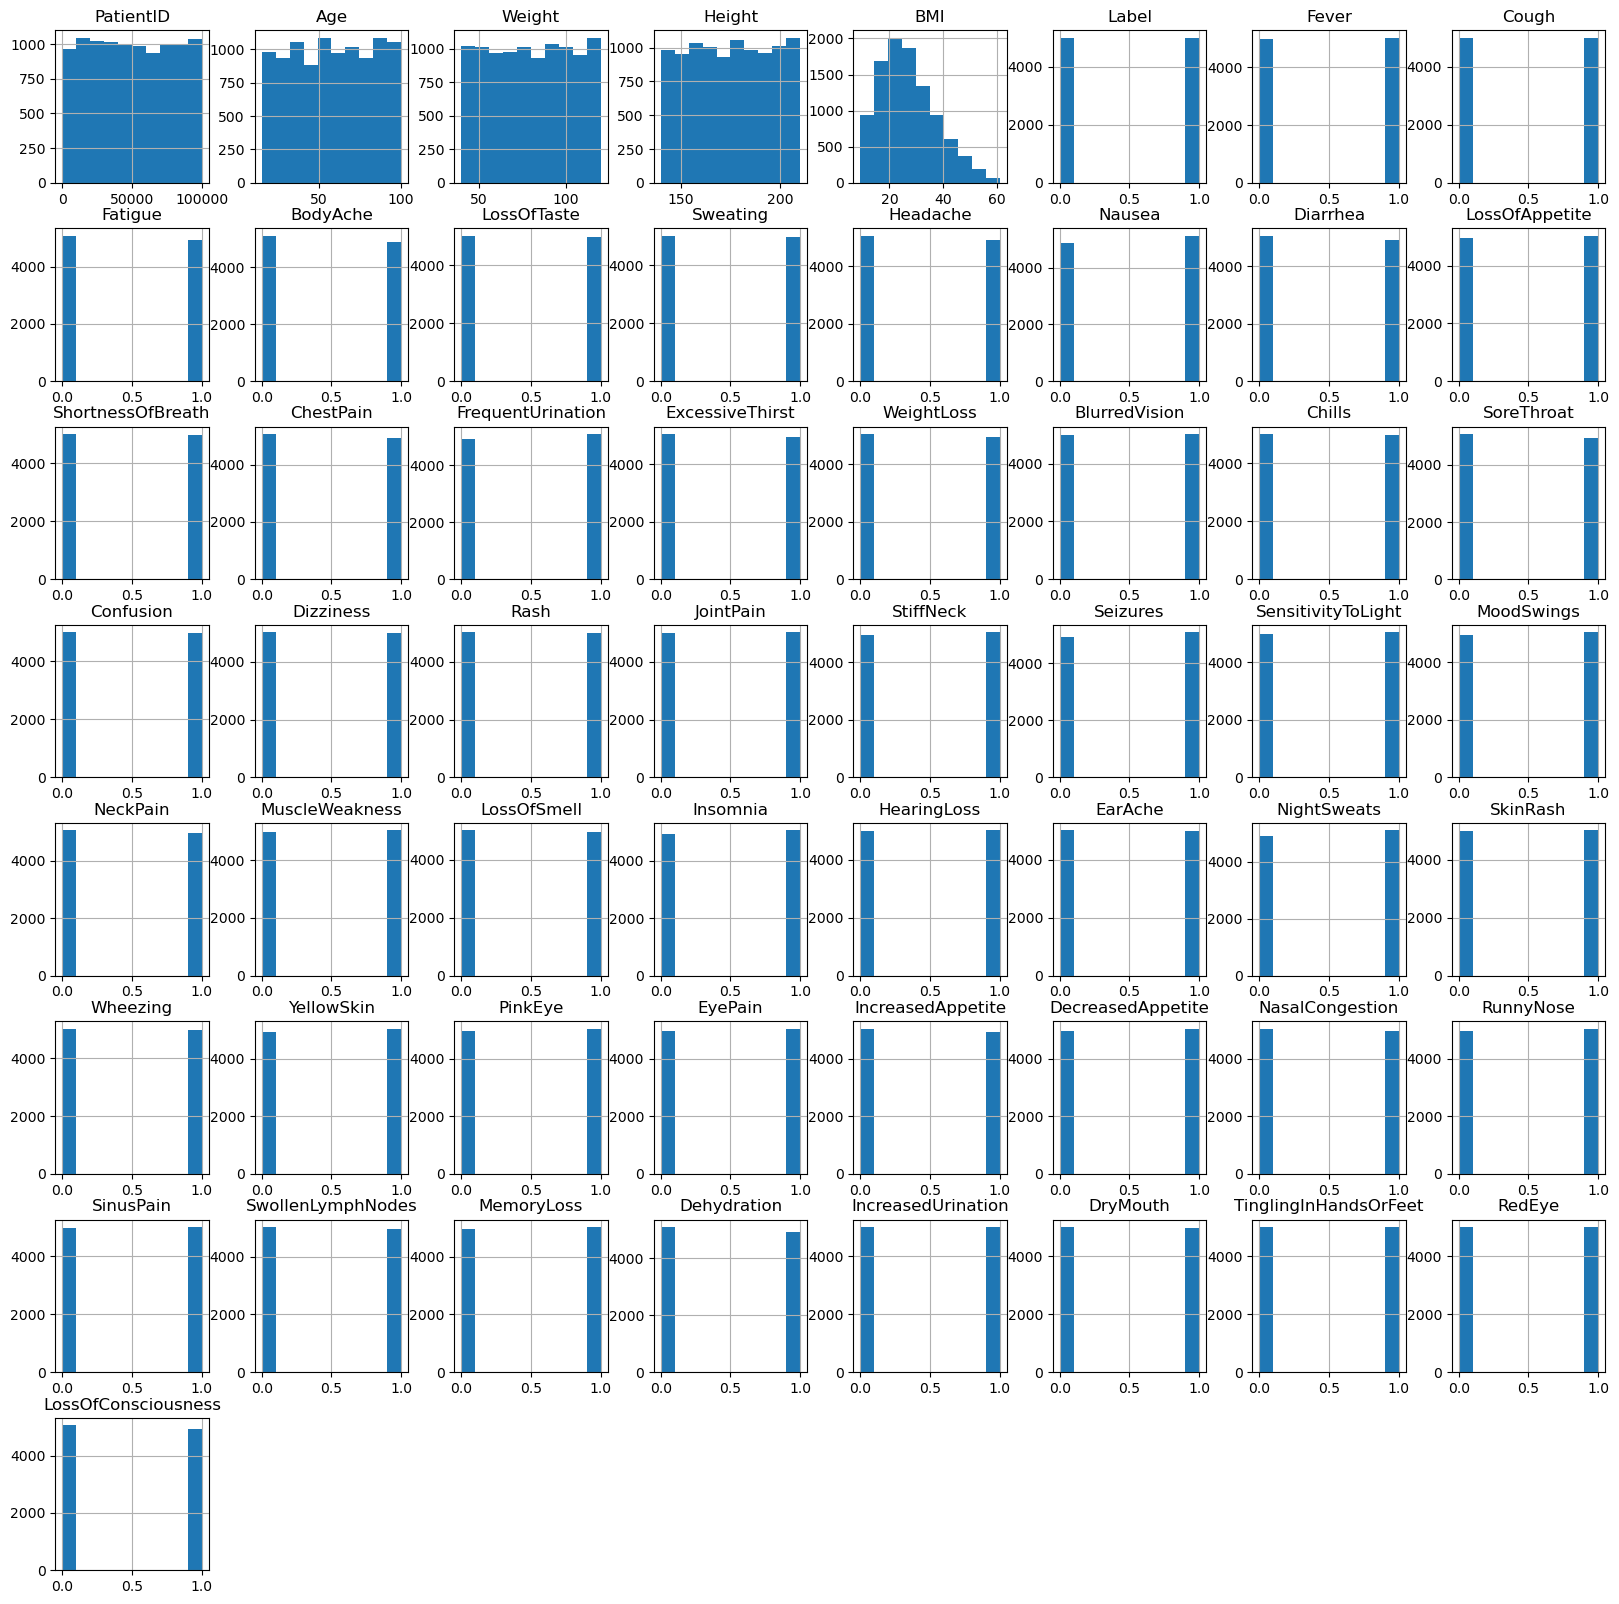

In [372]:
# Plotting the distribution of the fetal health data
patients.hist(figsize=(20,20));

In [373]:
features = features.corr()["Label"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("#006400", as_cmap=True)

style = features.style.background_gradient(cmap=cm)
style

This shows that our data is balanced according to the graph above given by the outcome Variable (Disease)

In [374]:
profile = pf.ProfileReport(patients)
profile.to_file('patients_Report.html') 

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **<span style="color:#C7920C;">PANDAS PROFILLING REPORT.</span>**

In [375]:
profile

### **<span style="color:#C7920C;">PREPARE THE DATA</span>**

We checked the value counts for our target column"Label". We will check how many classes does our target variable have:

In [376]:
patients.groupby('Label').count()

PatientID   Age  Gender  Sexual_Orientation  Race  Weight  Height  \
Label                                                                      
0           5003  5003    5003                5003  5003    5003    5003   
1           4997  4997    4997                4997  4997    4997    4997   

        BMI  Fever  Cough  ...  SinusPain  SwollenLymphNodes  MemoryLoss  \
Label                      ...                                             
0      5003   5003   5003  ...       5003               5003        5003   
1      4997   4997   4997  ...       4997               4997        4997   

       Dehydration  IncreasedUrination  DryMouth  TinglingInHandsOrFeet  \
Label                                                                     
0             5003                5003      5003                   5003   
1             4997                4997      4997                   4997   

       RedEye  LossOfConsciousness  Disease  
Label                                        
0        5003                 5003     5003  
1        4997                 4997     4997  

[2 rows x 60 columns]

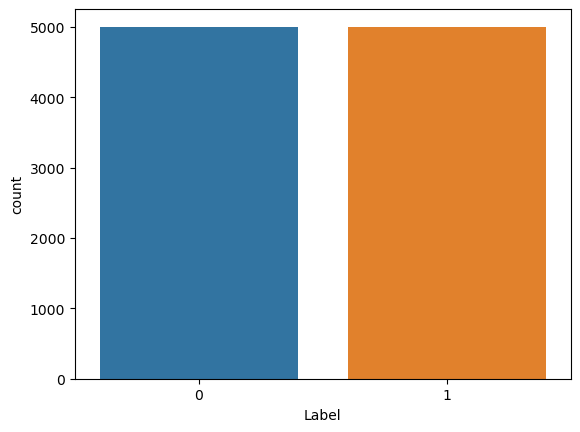

In [377]:
sns.countplot(x ='Label',  data = patients)
# Show the plot
plt.show()

In [378]:
#Check data types
patients.dtypes

PatientID                 int64
Age                       int64
Gender                   object
Sexual_Orientation       object
Race                     object
                          ...  
DryMouth                  int64
TinglingInHandsOrFeet     int64
RedEye                    int64
LossOfConsciousness       int64
Disease                  object
Length: 61, dtype: object

### Disease Symptoms

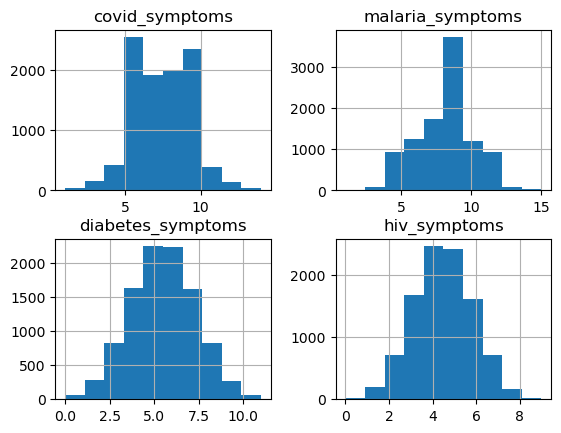

In [438]:
covid_symptoms = [ 'Fever', 'Cough', 'Fatigue', 'BodyAche',
                  'LossOfTaste', 'Headache', 'Nausea','Diarrhea',
                  'ShortnessOfBreath', 'ChestPain','Chills',
                  'SoreThroat', 'LossOfSmell','Wheezing', 
                  'NasalCongestion']

malaria_symptoms = ['Fever', 'Fatigue', 'BodyAche', 'Headache', 
                    'Nausea', 'Diarrhea', 'Chills','Confusion',
                    'Dizziness', 'JointPain','StiffNeck', 'Seizures', 
                    'MuscleWeakness', 'YellowSkin', 'PinkEye',
                    'LossOfConsciousness']

diabetes_symptoms = ['Fatigue','FrequentUrination','ExcessiveThirst', 
                     'WeightLoss', 'BlurredVision','MuscleWeakness', 
                     'IncreasedAppetite', 'DecreasedAppetite',
                     'IncreasedUrination', 'DryMouth','TinglingInHandsOrFeet']

hiv_symptoms = ['Fever', 'Fatigue', 'BodyAche', 'Chills',
                'SoreThroat','NightSweats', 'SkinRash', 
                'SwollenLymphNodes', 'DryMouth']
patients['covid_symptoms'] = patients[covid_symptoms].sum(axis = 1)
patients['malaria_symptoms'] = patients[malaria_symptoms].sum(axis = 1)
patients['diabetes_symptoms'] = patients[diabetes_symptoms].sum(axis = 1)
patients['hiv_symptoms'] = patients[hiv_symptoms].sum(axis = 1)
patients[['covid_symptoms','malaria_symptoms','diabetes_symptoms','hiv_symptoms']].hist();

#### **<span style="color:#C7920C;">DATA TRANSFORMATION</span>**
So, there are object data types in our data that We have to convert these labels to numeric (int64) form, so they become machine-readable and we can do this through label encoding:
First we call out those that not int64.

In [379]:
#patients.select_dtypes(include='object')
#This cant now work because we have encoded it

In [380]:

from sklearn.preprocessing import LabelEncoder

def label_encoder(column):
    le = LabelEncoder()
    patients[column] = le.fit_transform(patients[column])

label_list = ["Gender", "Sexual_Orientation", "Race", "Disease"]
for label in label_list:
    label_encoder(label)

# Display transformed data
patients.head()


PatientID  Age  Gender  Sexual_Orientation  Race  Weight  Height   BMI  \
0      33216   72       0                   4     4     112     156  46.0   
1      89319   45       0                   4     2      40     190  11.1   
2      48170   44       1                   3     0     112     209  25.6   
3      83430   40       1                   2     3      83     195  21.8   
4      67143   81       1                   0     0      83     144  40.0   

   Label  Fever  ...  SinusPain  SwollenLymphNodes  MemoryLoss  Dehydration  \
0      1      0  ...          1                  1           0            0   
1      1      1  ...          1                  0           0            1   
2      0      0  ...          1                  1           0            0   
3      1      0  ...          0                  1           1            1   
4      0      1  ...          0                  1           1            0   

   IncreasedUrination  DryMouth  TinglingInHandsOrFeet  RedEye  \
0                   1         1                      1       0   
1                   0         1                      1       1   
2                   1         1                      1       0   
3                   0         1                      0       1   
4                   0         0                      0       0   

   LossOfConsciousness  Disease  
0                    1        3  
1                    1        0  
2                    0        4  
3                    0        1  
4                    1        0  

[5 rows x 61 columns]

### **<span style="color:#C7920C;">SPLIT THE DATA.</span>**

In [381]:
#Divide the dataset into independent and dependent variables
X = patients.drop(["Label"],axis=1)
y = patients['Label']
#Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state = 42) 
#Data was splitted as 80% train data and 20% test data.
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (8000, 60)
X_test shape: (2000, 60)
y_train shape: (8000, 1)
y_test shape: (2000, 1)


### **<span style="color:#C7920C;">STANDARDIZE THE DATA.</span>**
We will perform feature scaling to rescale data to have a mean of 0 and standard deviation of 1 (unit variance)

In [382]:
#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### **<span style="color:#C7920C;">IMPLEMENT CLASSIFICATION MODELS.</span>**

In [383]:
#To store results of models, we create two dictionaries
result_dict_train = {}
result_dict_test = {}

#LogisticRegression
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train, y_train, cv=5)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
#Obtain accuracy
print("LogisticRegression Train Score:",np.mean(accuracies))
print("LogisticRegression Test Score:",reg.score(X_test,y_test))
#Store results in the dictionaries
result_dict_train["Logistic Train Score"] = np.mean(accuracies)
result_dict_test["Logistic Test Score"] = reg.score(X_test,y_test)

print("\n" * 2)

#KNeighborsClassifier
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
#Obtain accuracy
print("KNeighborsClassifier Train Score:",np.mean(accuracies))
print("KNeighborsClassifier Test Score:",knn.score(X_test,y_test))
#Store results in the dictionaries
result_dict_train["KNN Train Score"] = np.mean(accuracies)
result_dict_test["KNN Test Score"] = knn.score(X_test,y_test)

print("\n" * 2)
#SVM
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
#Obtain accuracy
print("SVM Train Score:",np.mean(accuracies))
print("SVM Test Score:",svc.score(X_test,y_test))
#Store results in the dictionaries
result_dict_train["SVM Train Score"] = np.mean(accuracies)
result_dict_test["SVM Test Score"] = svc.score(X_test,y_test)

print("\n" * 2)

#DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
#Obtain accuracy
print("DecisionTreeClassifier Train Score:",np.mean(accuracies))
print("DecisionTreeClassifier Test Score:",dtc.score(X_test,y_test))
#Store results in the dictionaries
result_dict_train["Decision Tree Train Score"] = np.mean(accuracies)
result_dict_test["Decision Tree Test Score"] = dtc.score(X_test,y_test)

print("\n" * 2)

#RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
#Obtain accuracy
print("RandomForestClassifier Train Score:",np.mean(accuracies))
print("RandomForestClassifier Test Score:",rfc.score(X_test,y_test))
#Store results in the dictionaries
result_dict_train["Random Forest Train Score"] = np.mean(accuracies)
result_dict_test["Random Forest Test Score"] = rfc.score(X_test,y_test)

print("\n" * 2)

#GaussianNB
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train, y_train, cv=5)
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
#Obtain accuracy
print("GaussianNB Train Score:",np.mean(accuracies))
print("GaussianNB Test Score:",gnb.score(X_test,y_test))
#Store results in the dictionaries
result_dict_train["Gaussian NB Train Score"] = np.mean(accuracies)
result_dict_test["Gaussian NB Test Score"] = gnb.score(X_test,y_test)


LogisticRegression Train Score: 0.50725
LogisticRegression Test Score: 0.4955



KNeighborsClassifier Train Score: 0.492
KNeighborsClassifier Test Score: 0.4885



SVM Train Score: 0.500875
SVM Test Score: 0.496



DecisionTreeClassifier Train Score: 0.504625
DecisionTreeClassifier Test Score: 0.4915



RandomForestClassifier Train Score: 0.49350000000000005
RandomForestClassifier Test Score: 0.489



GaussianNB Train Score: 0.510125
GaussianNB Test Score: 0.5005


**<span style="color:#C7920C;">From the above results, the logistic regression and Gaussian Naive Bayes models have the highest training and testing scores, indicating better performance compared to the other models. However, the scores for all models are relatively close, suggesting that none of the models are significantly outperforming the others</span>**

###  **<span style="color:#C7920C;">COMPARE ACCURACY SCORE.</span>**

In [384]:
patients_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Score"])
patients_result_train

Score
Logistic Train Score       0.507250
KNN Train Score            0.492000
SVM Train Score            0.500875
Decision Tree Train Score  0.504625
Random Forest Train Score  0.493500
Gaussian NB Train Score    0.510125

In [385]:
patients_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Score"])
patients_result_test


Score
Logistic Test Score       0.4955
KNN Test Score            0.4885
SVM Test Score            0.4960
Decision Tree Test Score  0.4915
Random Forest Test Score  0.4890
Gaussian NB Test Score    0.5005

**<span style="color:#C7920C;">From the above results, the logistic regression and Gaussian Naive Bayes models demonstrate relatively better performance compared to the other models, as they achieve higher test and train scores while showing less overfitting tendencies. However, the differences in scores between the models are relatively small, indicating that the overall performance might be similar.</span>**

### **<span style="color:#C7920C;">DISPLAY THE ACCURACY SCORE.</span>**

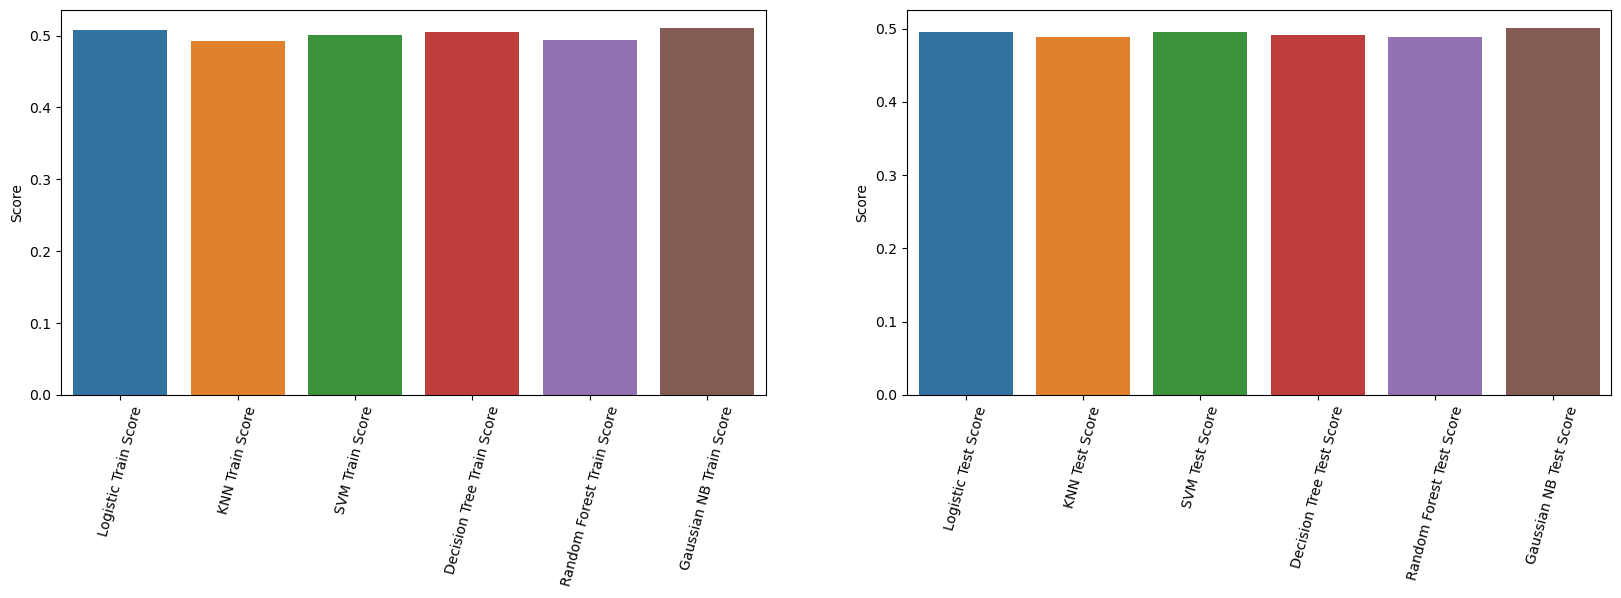

In [386]:
import seaborn as sns
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x = patients_result_train.index,y = patients_result_train.Score,ax = ax[0])
sns.barplot(x = patients_result_test.index,y = patients_result_test.Score,ax = ax[1])
ax[0].set_xticklabels(patients_result_train.index,rotation = 75)
ax[1].set_xticklabels(patients_result_test.index,rotation = 75)
plt.show()

From the above graphs, we can conclude the following:
- The LogisticRegression and GaussianNB have the highest test score
- The Random Forest classifier has the lowest score among all classifiers.

### **<span style="color:#C7920C;">EDITING THE DATA SET</span>**

In [387]:
#lets drop the highly corelated columns 

dataDrop= patients.drop(['Weight', 'Height'], axis=1)

In [388]:
dataDrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PatientID              10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Gender                 10000 non-null  int64  
 3   Sexual_Orientation     10000 non-null  int64  
 4   Race                   10000 non-null  int64  
 5   BMI                    10000 non-null  float64
 6   Label                  10000 non-null  int64  
 7   Fever                  10000 non-null  int64  
 8   Cough                  10000 non-null  int64  
 9   Fatigue                10000 non-null  int64  
 10  BodyAche               10000 non-null  int64  
 11  LossOfTaste            10000 non-null  int64  
 12  Sweating               10000 non-null  int64  
 13  Headache               10000 non-null  int64  
 14  Nausea                 10000 non-null  int64  
 15  Dia

In [389]:
X = dataDrop.drop('Label', axis=1)  # Features
y = dataDrop['Label']  # Target variable

In [390]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())])
numeric_features=['Age','Gender','Sexual_Orientation','Race','Weight','Height','BMI',
                  'Fever','SwollenLymphNodes','MemoryLoss','Dehydration','IncreasedUrination',
                  'DryMouth','TinglingInHandsOrFeet','RedEye','LossOfConsciousness','Disease','Label']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  # numeric_features refers to a list of column names with numeric variables
          # categorical_features refers to a list of column names with categorical variables
    ])

In [391]:
X_transformed = preprocessor.fit_transform(patients)

In [392]:
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import accuracy_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define a list of models to train
models = [
    LinearRegression(),
    LogisticRegression(),
    DecisionTreeRegressor(),
    DecisionTreeClassifier(),
    RandomForestRegressor(),
    RandomForestClassifier(),
    SVR(),
    SVC()
]

# Train and evaluate each model on the testing set
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if isinstance(model, LinearRegression) or isinstance(model, DecisionTreeRegressor) or isinstance(model, RandomForestRegressor) or isinstance(model, SVR):
        # For regression models, convert predictions to classes (classification) by rounding to the nearest integer
        y_pred_classes = np.round(y_pred)
        accuracy = accuracy_score(y_test, y_pred_classes)
    else:
        # For classification models, directly calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
    print(f"{type(model).__name__}: Testing Accuracy = {accuracy:.2f}")


LinearRegression: Testing Accuracy = 1.00
LogisticRegression: Testing Accuracy = 1.00
DecisionTreeRegressor: Testing Accuracy = 1.00
DecisionTreeClassifier: Testing Accuracy = 1.00
RandomForestRegressor: Testing Accuracy = 1.00
RandomForestClassifier: Testing Accuracy = 1.00
SVR: Testing Accuracy = 1.00
SVC: Testing Accuracy = 1.00


The models exhibited exceptional performance with perfect testing accuracy which shows that they were able to accurately predict the outcomes on the testing dataset without any errors. However there is a posibility of over fitting

### **<span style="color:#C7920C;">Accuracy Score</span>**
The F1 scores indicate the performance of the models on a specific test set, while the cross-validation scores provide an estimate of their generalization performance across different subsets of the data.

In [394]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 1.000000 
Decision Tree: 1.000000 
RandomForest: 1.000000 
SVC: 1.000000 


**<span style="color:#C7920C;">The above scores show that Radom forest and Logistic regression has the highest score. however they also suggest that the models are not learning the patterns or relationships within the data effectively, and their predictions are not much better than random chance thus there is something wrong with the data.</span>**

## Tunning Logistic Regression
Considering F1 Score of Logistic Regression, we try to tune it

In [395]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.base import clone

# Create an instance of LogisticRegression
estimator = LogisticRegression()

# Clone the estimator
cloned_estimator = clone(estimator)

parameters = { 
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 110, 120, 130, 140],
    'dual': [True, False]
}

# Fitting the training set to find parameters with the best accuracy
CV_rfc = GridSearchCV(cloned_estimator, param_grid=parameters, cv=5)
CV_rfc.fit(X_train, y_train)

# Getting the outcome of grid search
CV_rfc.best_params_



{'C': 0.1,
 'dual': True,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'liblinear'}

In [437]:
LR_model = LogisticRegression(**CV_rfc.best_params_)
LR_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=LR_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.491

In [435]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
acccuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions, average="weighted")
precision = precision_score(y_test, predictions, average="weighted")
f1_score = f1_score(y_test, predictions, average="micro")

print("********* LogisticRegression Results *********")
print("Accuracy    : ", acccuracy)
print("Recall      : ", recall)
print("Precision   : ", precision)
print("F1 Score    : ", f1_score)

********* LogisticRegression Results *********
Accuracy    :  0.491
Recall      :  0.491
Precision   :  0.241081
F1 Score    :  0.491


**<span style="color:#C7920C;">Based on these results, the logistic regression model's performance on the given dataset is not particularly strong. The accuracy, recall, and F1 score are all around 0.491, which suggests that the model's predictions are not significantly better than random guessing. Additionally, the low precision score of 0.241081 indicates that the model has a high rate of false positives..</span>**

### Using BEST K VALUES:

In [425]:
from sklearn.preprocessing import LabelEncoder
datam = read_csv('dataset.csv')
le = LabelEncoder()
datam['Gender'] = le.fit_transform(datam['Gender'])
datam['Sexual_Orientation'] = le.fit_transform(datam['Sexual_Orientation'])
datam['Race'] = le.fit_transform(datam['Race'])
datam['Disease']= le.fit_transform(datam['Disease'])

In [426]:
# Split dataset into inputs and outputs
values = datam.values
X = values[:, :-1]
y = values[:,8]

In [427]:
# Extract a column by index
column_index = 8  # Replace '2' with the desired index of the column
column = datam.iloc[:, column_index]
column

0       1
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: Label, Length: 10000, dtype: int64

In [428]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Extract the input features (X) and target variable (y) from the dataset
X = datam.drop("Label", axis=1)  # Adjust the column indices as per your dataset
y = datam["Label"]   # Adjust the column index for the target variable

# Create an instance of SelectKBest with the chi2 scoring function
selector = SelectKBest(score_func=chi2, k=10)

# Apply feature selection to the input features X and target variable y
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print(feature)



Selected Features:
PatientID
Age
Race
Weight
ExcessiveThirst
BlurredVision
Chills
SensitivityToLight
YellowSkin
NasalCongestion


In [424]:
# Initiate the LR model with random hyperparameters
lr = LogisticRegression(penalty='l1',dual=False,max_iter=110)

we have created the Logistic Regression model with some random hyperparameter values. The hyperparameters that you used are:
- penalty : Used to specify the norm used in the penalization (regularization).
- dual : Dual or primal formulation. The dual formulation is only implemented for l2 penalty with liblinear solver. Prefer dual=False when n_samples > n_features.
- max_iter : Maximum number of iterations taken to converge.

In [423]:
lr = LogisticRegression(penalty='l1', solver='liblinear')

In [422]:
dropdata = datam.drop(columns=['PatientID'])

In [421]:
# Pass data to the LR model
lr.fit(X,y)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
#check accuracy
lr.score(X,y)

0.5247

From the results above, we applied your LR model to the same data and evaluated its score. But there is always a need to validate the stability of your machine learning model. You just can’t fit the model to your training data and hope it would accurately work for the real data it has never seen before. You need some kind of assurance that your model has got most of the patterns from the data correct.

In [420]:
# Build the k-fold cross-validator

kfold = KFold(n_splits=3, shuffle=True, random_state=7)

We used n_splits as 3, which essentially makes it a 3-fold cross-validation then random_state as 7to reproduce the results but  any integer value  could work as well.

In [418]:
result = cross_val_score(lr, X, y, cv=kfold, scoring='accuracy')
print(result.mean())

0.5195004203479736


In [419]:
dual=[False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [416]:
#import time

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

#start_time = time.time()
grid_result = grid.fit(X, y)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.515000 using {'dual': False, 'max_iter': 100}


In [417]:
# Define the selected features
selected_features = [
    'Age',
    'Race',
    'Weight',
    'ExcessiveThirst',
    'BlurredVision',
    'Chills',
    'SensitivityToLight',
    'YellowSkin',
    'NasalCongestion',
    
]

# Split the data into features (X) and target variable (y) using the selected features
X = datam[selected_features]  # Features using the selected columns
y = datam['Label']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train the models
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print("{} Accuracy: {:.2f}".format(model_name, accuracy))


Logistic Regression Accuracy: 0.52
Decision Tree Accuracy: 0.49
Random Forest Accuracy: 0.48
Support Vector Machine Accuracy: 0.49


From the above results, we would consider Logisitic Regression Model due to its high Accuracy from the others however, the model doesn't learn anything useful since its  accuracy is around 50% and the other models arent better off either way. thus there is no conclusive model for this data